#**Dataset** from kaggle: [Fake news detection](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)
ِ

##**About dataset**<br>
### Dataset separated in two files:<br>

Fake.csv (23502 fake news article)<br>
True.csv (21417 true news article)<br>
<br>

### Dataset columns:
<br>
1.   Title: title of news article<br>
2.   Text: body text of news article<br>
3.   Subject: subject of news article<br>
4.   Date: publish date of news article

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# **Ahmed Alshafeay**

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline
import string
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score , precision_score, recall_score, f1_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from wordcloud import WordCloud
import spacy

Mounted at /content/drive


##Import important sources

In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


## Load dataset

In [ ]:
data1_path = '/content/drive/My Drive/Dataset/True.csv'
data2_path = '/content/drive/My Drive/Dataset/Fake.csv'

In [ ]:
fake=pd.read_csv(data2_path)
true=pd.read_csv(data1_path)

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


##Labeling the data

In [ ]:
fake['label']=0
true['label']=1

### Combine the dataset

In [ ]:
df=pd.concat([fake,true],axis=0,ignore_index=True)
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
df.shape

(44898, 5)

In [ ]:
df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [ ]:
df['content']=df['title']+" "+df['text']

## **EDA**

In [ ]:
print(df['label'].value_counts())
print(df['label'].value_counts(normalize=True))


label
0    23481
1    21417
Name: count, dtype: int64
label
0    0.522985
1    0.477015
Name: proportion, dtype: float64


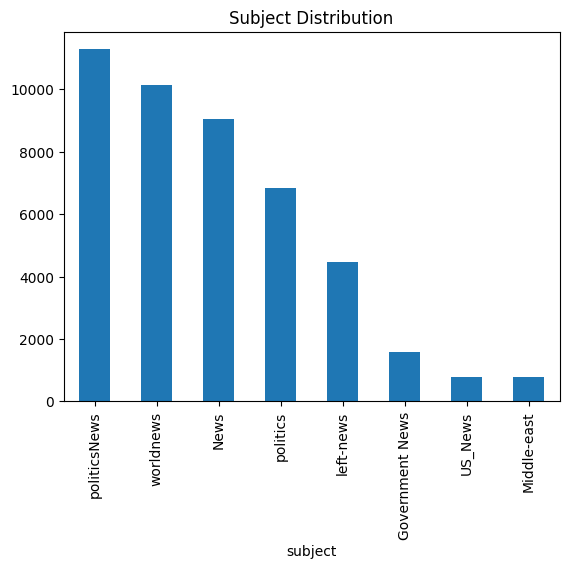

In [ ]:
df['subject'].value_counts().plot(kind='bar', title='Subject Distribution')
plt.show()

## **Text preprocessing**

### Tokenization

In [ ]:
df['tokens'] = df['content'].apply(word_tokenize)

In [ ]:
print(df['tokens'].head())

0    [Donald, Trump, Sends, Out, Embarrassing, New,...
1    [Drunk, Bragging, Trump, Staffer, Started, Rus...
2    [Sheriff, David, Clarke, Becomes, An, Internet...
3    [Trump, Is, So, Obsessed, He, Even, Has, Obama...
4    [Pope, Francis, Just, Called, Out, Donald, Tru...
Name: tokens, dtype: object


### Lowercasing

In [ ]:
df['tokens'] = df['tokens'].apply(lambda tokens: [word.lower() for word in tokens])

print(df['tokens'].head())

0    [donald, trump, sends, out, embarrassing, new,...
1    [drunk, bragging, trump, staffer, started, rus...
2    [sheriff, david, clarke, becomes, an, internet...
3    [trump, is, so, obsessed, he, even, has, obama...
4    [pope, francis, just, called, out, donald, tru...
Name: tokens, dtype: object


### Removing punctuation

In [ ]:
df['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word.isalnum()])

print(df['tokens'].head())

0    [donald, trump, sends, out, embarrassing, new,...
1    [drunk, bragging, trump, staffer, started, rus...
2    [sheriff, david, clarke, becomes, an, internet...
3    [trump, is, so, obsessed, he, even, has, obama...
4    [pope, francis, just, called, out, donald, tru...
Name: tokens, dtype: object


### Stopwords removal

In [ ]:
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

print(df['tokens'].head())

0    [donald, trump, sends, embarrassing, new, year...
1    [drunk, bragging, trump, staffer, started, rus...
2    [sheriff, david, clarke, becomes, internet, jo...
3    [trump, obsessed, even, obama, name, coded, we...
4    [pope, francis, called, donald, trump, christm...
Name: tokens, dtype: object


### POS tagging

In [ ]:
df['pos_tags'] = df['tokens'].apply(pos_tag)

print(df['pos_tags'].head())

0    [(donald, JJ), (trump, NN), (sends, NNS), (emb...
1    [(drunk, NN), (bragging, VBG), (trump, NN), (s...
2    [(sheriff, NN), (david, NN), (clarke, NN), (be...
3    [(trump, NN), (obsessed, VBD), (even, RB), (ob...
4    [(pope, NN), (francis, NN), (called, VBN), (do...
Name: pos_tags, dtype: object


### lemmatization

In [ ]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['pos_tags'].apply(lambda tagged: [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged])

In [ ]:
df['clean_content'] = df['lemmatized'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
df['text_length'] = df['lemmatized'].apply(len)

## EDA for clean data

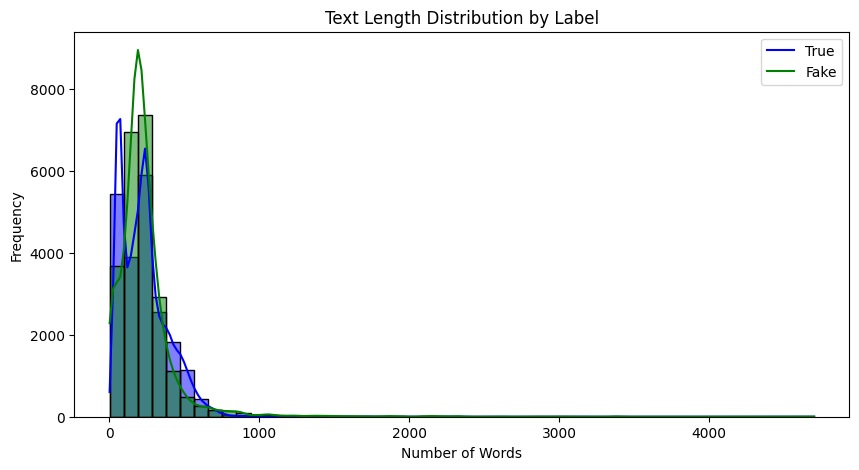

In [ ]:
 plt.figure(figsize=(10, 5))
 sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True, palette={1: "blue", 0: "green"})
 plt.title("Text Length Distribution by Label")
 plt.xlabel("Number of Words")
 plt.ylabel("Frequency")
 plt.legend(labels=["True", "Fake"])
 plt.show()

In [ ]:
true_words = ' '.join(df[df['label'] == 1]['clean_content'])
fake_words = ' '.join(df[df['label'] == 0]['clean_content'])

In [ ]:
true_wc = WordCloud(width=800, height=400, background_color='white').generate(true_words)
fake_wc = WordCloud(width=800, height=400, background_color='white').generate(fake_words)

Text(0.5, 1.0, 'Word Cloud - True News')

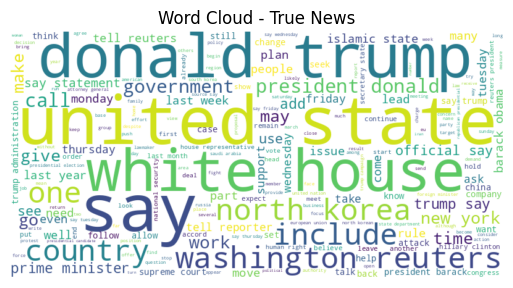

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(true_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - True News")

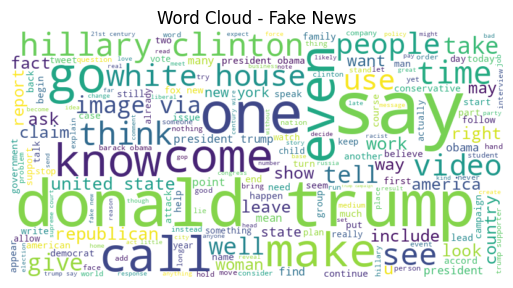

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Fake News")
plt.show()

## Split data

In [ ]:
X = df['clean_content']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## TF_IDF Vectorizer

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
print("Vocabulary sample:", vectorizer.get_feature_names_out()[:10])
print("TF-IDF train Representation (first sample):\n", X_train_tfidf[0].toarray())
print("TF-IDF test Representation (first sample):\n", X_test_tfidf[0].toarray())

Vocabulary sample: ['00' '000' '0000' '0005' '0009' '0018' '0019' '0020' '0036' '0040']
TF-IDF train Representation (first sample):
 [[0. 0. 0. ... 0. 0. 0.]]
TF-IDF test Representation (first sample):
 [[0.         0.         0.         ... 0.         0.16962215 0.        ]]


## **Modeling**

In [ ]:
svm_model = LinearSVC()
nb_model = MultinomialNB()

In [ ]:
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

In [ ]:
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

## Prediction

In [ ]:
svm_preds = svm_model.predict(X_test_tfidf)
nb_preds = nb_model.predict(X_test_tfidf)

## Accuracy

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_preds)
nb_accuracy = accuracy_score(y_test, nb_preds)

print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")

SVM Accuracy: 99.37%
Naive Bayes Accuracy: 92.86%


## Evaluation

In [ ]:
svm_report = classification_report(y_test, svm_preds, output_dict=True)
nb_report = classification_report(y_test, nb_preds, output_dict=True)

In [ ]:
svm_df = pd.DataFrame(svm_report).transpose()
nb_df = pd.DataFrame(nb_report).transpose()

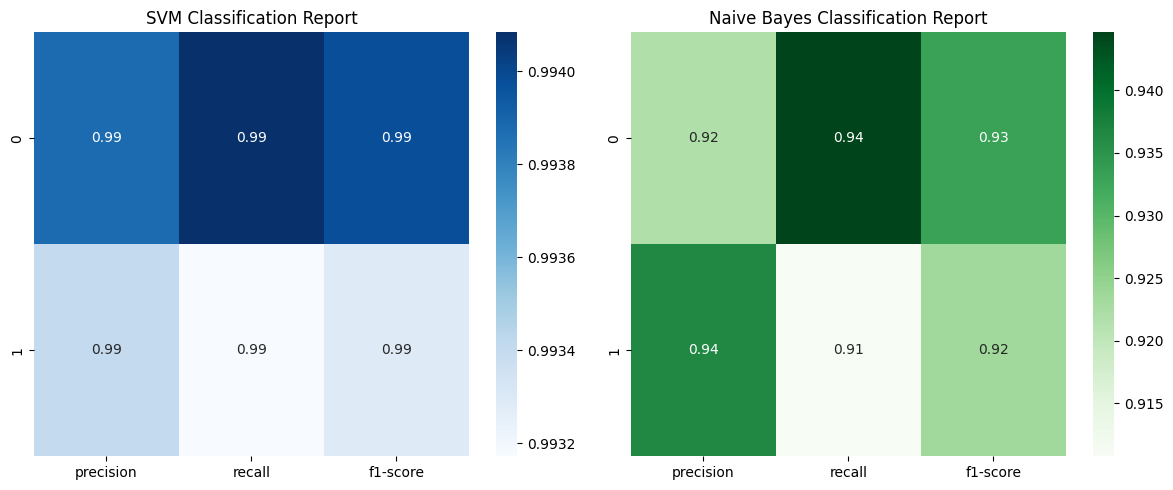

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(svm_df.iloc[:2, :-1], annot=True, cmap="Blues")
plt.title("SVM Classification Report")

plt.subplot(1, 2, 2)
sns.heatmap(nb_df.iloc[:2, :-1], annot=True, cmap="Greens")
plt.title("Naive Bayes Classification Report")

plt.tight_layout()
plt.show()

### Confusion matrices

In [ ]:
svm_cm = confusion_matrix(y_test, svm_preds)
nb_cm = confusion_matrix(y_test, nb_preds)

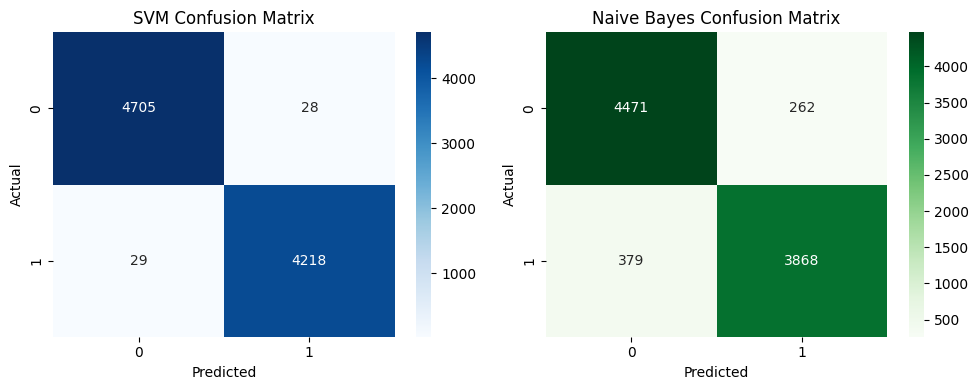

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap="Greens")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

### Calculate metrics <br> F1_Score<br> Precision <br> Recall

In [ ]:
svm_precision = precision_score(y_test, svm_preds, average='weighted', zero_division=0)
svm_recall = recall_score(y_test, svm_preds, average='weighted', zero_division=0)
svm_f1 = f1_score(y_test, svm_preds, average='weighted', zero_division=0)

In [ ]:
nb_precision = precision_score(y_test, nb_preds, average='weighted', zero_division=0)
nb_recall = recall_score(y_test, nb_preds, average='weighted', zero_division=0)
nb_f1 = f1_score(y_test, nb_preds, average='weighted', zero_division=0)

In [ ]:
metrics = ['Precision', 'Recall', 'F1-Score']
svm_scores = [svm_precision, svm_recall, svm_f1]
nb_scores = [nb_precision, nb_recall, nb_f1]

x = np.arange(len(metrics))
width = 0.35

In [ ]:
print("y_test:", y_test[:5])
print("svm_preds:", svm_preds[:5])
print("nb_preds:", nb_preds[:5])

y_test: 22216    0
27917    1
25007    1
1377     0
32476    1
Name: label, dtype: int64
svm_preds: [0 1 1 0 1]
nb_preds: [0 1 1 0 1]


In [ ]:
metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'SVM': [svm_precision, svm_recall, svm_f1],
    'Naive Bayes': [nb_precision, nb_recall, nb_f1]
}

metrics_df = pd.DataFrame(metrics_data)
print(" Model Evaluation Metrics:\n")
print(metrics_df.to_string(index=False, float_format="%.2f"))

🔍 Model Evaluation Metrics:

   Metric  SVM  Naive Bayes
Precision 0.99         0.93
   Recall 0.99         0.93
 F1-Score 0.99         0.93
